In [1]:
import pandas
#FILE_PATH = '../logs/joined_datasets_rolling.csv'
FILE_PATH = '../logs/joined_datasets_even-split.csv'
df = pandas.read_csv(FILE_PATH)

In [2]:
## Class distribution
print(df[df.columns[0]].value_counts())

Consumer              8243
EcologicalConsumer    7802
LazyConsumer          6895
Name: Unnamed: 0, dtype: int64


In [3]:
## Aggregate data for all prices, distances, and ecology
import numpy as np
aggregate = np.asarray([np.concatenate([df[str(col)].values for col in range(i, len(df.columns)-1, 3)]) for i in range(3)])

agg_df = pandas.DataFrame.from_records(aggregate.T)

In [4]:
agg_df = agg_df.rename(columns={0: 'Price per Unit', 1: 'Percent Renewable', 2: 'Distance'})

agg_df.describe()

,Price per Unit,Percent Renewable,Distance
count,114700.000000,114700.000000,114700.000000
mean,14.804603,0.141561,160.185618
std,1.685296,0.257165,60.036497
min,9.000000,0.000000,82.873400
25%,14.000000,0.000000,111.865990
50%,15.000000,0.000000,141.449630
75%,16.000000,0.342051,195.064090
max,23.000000,1.000000,345.974000


                   Price per Unit  Percent Renewable  Distance
Price per Unit           1.000000          -0.281139 -0.027181
Percent Renewable       -0.281139           1.000000  0.011075
Distance                -0.027181           0.011075  1.000000


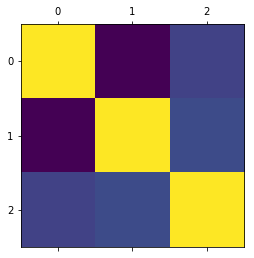

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
print(agg_df.corr())
plt.matshow(agg_df.corr())
plt.savefig('correlation_matrix.png')

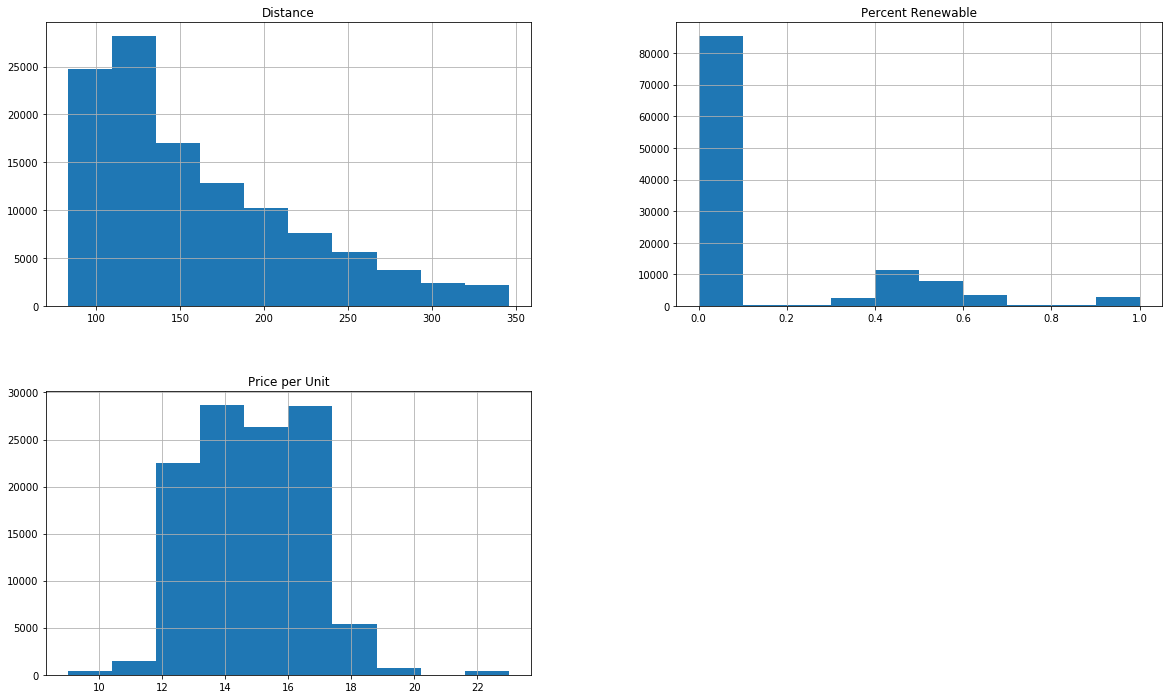

In [6]:
agg_df.hist(figsize=(20,12))
plt.savefig('histogram.png')

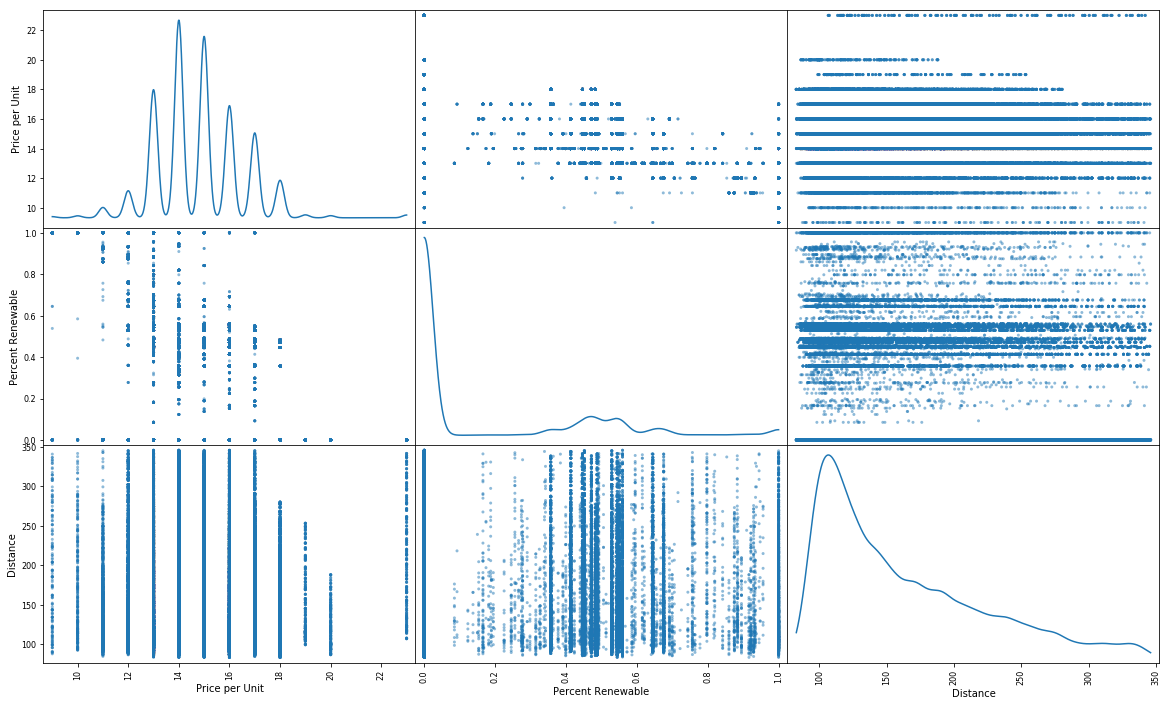

In [7]:
from pandas.plotting import scatter_matrix

scatter_matrix(agg_df, diagonal='kde', figsize=(20,12))
plt.savefig('scatter_matrix.png')